## is immigration rate from migest related to site distance?

In [2]:
Packages <- c("dplyr", "broom", "gdata","lme4", "ape","vegan","viridis", "ggpubr","gridExtra", "colorRamps","ggplot2", "fields", "stringr", "reshape2", "splitstackshape", "readr", "dplyr", "tidyr", "stringr", "tidyverse", "tibble", "ggfortify", "lubridate", "RColorBrewer", "vegan", "vcfR")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0


setwd('/local/home/katrinac/migest')

source("~/scripts/conleyte.R")
source("~/scripts/conlabor.R")
#labor <- conlabor()
#leyte <- conleyte()

In [3]:
##read data as data frame
conndfall <- read.table("~/migest/input/conndfall.txt", header=TRUE, sep=",", stringsAsFactors=FALSE)
conndf12 <- read.table("~/migest/input/conndf2012.txt", header=TRUE, sep=",")
conndf13 <- read.table("~/migest/input/conndf2013.txt", header=TRUE, sep=",")
conndf14 <- read.table("~/migest/input/conndf2014.txt", header=TRUE, sep=",")
conndf15 <- read.table("~/migest/input/conndf2015.txt", header=TRUE, sep=",")
#all years together in one df
conndf_allyears <- read.table("~/migest/input/conndf_allyears.txt", header=TRUE, sep=",", stringsAsFactors=FALSE)
#change the years to numeric
conndf_allyears$year <- gsub("migration_rate", "20", conndf_allyears$year)


#read in connectivity matrices 

connmat_all <- read.table(file="~/migest/average_allyears/20180921_prop_samp_corr2/migest_conmat_all.txt", header=TRUE)
connmat12 <- read.table(file="~/migest/annual/2012/20180921_prop_samp_corr2/migest_conmat12_2.txt", header=TRUE)
connmat13 <- read.table(file="~/migest/annual/2013/20180921_prop_samp_corr2/migest_conmat13_2.txt", header=TRUE)
connmat14 <- read.table(file="~/migest/annual/2014/20180921_prop_samp_corr2/migest_conmat14_2.txt", header=TRUE)
connmat15 <- read.table(file="~/migest/annual/2015/20180921_prop_samp_corr2/migest_conmat15_2.txt", header=TRUE)


#read in a distance matrix
dist <- read.csv("~/parentage/kernel_fitting/distance_matrix_header.csv", header=TRUE,)
names(dist) <- gsub("\\.", " ", names(dist))

#read in the site codes
sites_all <- read.table(file="~/migest/average_allyears/20180921_prop_samp_corr2/input_sites_all.txt", header=TRUE)
sites_all$site <- gsub("_", " ", sites_all$site, fixed=TRUE)
sites12 <- read.table(file="~/migest/annual/2012/20180921_prop_samp_corr2/input_sites_2012.txt", header= TRUE)
sites12$site <- gsub("_", " ", sites12$site, fixed=TRUE)
sites13 <- read.table(file="~/migest/annual/2013/20180921_prop_samp_corr2/input_sites_2013.txt", header=TRUE)
sites13$site <- gsub("_", " ", sites13$site, fixed=TRUE)
sites14 <- read.table(file="~/migest/annual/2014/20180921_prop_samp_corr2/input_sites_2014.txt", header=TRUE)
sites14$site <- gsub("_", " ", sites14$site, fixed=TRUE)
sites15 <- read.table(file="~/migest/annual/2015/20180921_prop_samp_corr2/input_sites_2015.txt", header=TRUE)
sites15$site <- gsub("_", " ", sites15$site, fixed=TRUE)

#read in site area
area <- read.csv("~/parentage/kernel_fitting/site_area_header.csv", header=TRUE,)
area$site <- gsub("\\_", " ", area$site)

#make list of site names north to south to make distance and connectivity matrices compatible
sites_NS <- as.data.frame(dist$site, stringsAsFactors = FALSE) %>% rename(site="dist$site") 
sites_all_NS <- suppressWarnings(left_join(sites_NS, sites_all, by="site"))
#arrange annual site lists NS
sites12_NS <- suppressWarnings(inner_join(sites_NS, sites12, by="site"))
sites13_NS <- suppressWarnings(inner_join(sites_NS, sites13, by="site"))
sites14_NS <- suppressWarnings(inner_join(sites_NS, sites14, by="site"))
sites15_NS <- suppressWarnings(inner_join(sites_NS, sites15, by="site"))


#make distance matrix for all years connectivity
#prep matrices for mantel test

#sort sites NS
connmat_all_beta <- left_join(sites_all_NS, connmat_all, by=c(pop="Pop"))
connmat_all_NS <- connmat_all_beta %>%
    select(-Ghost, -pop) %>%
    t()

##filter the matrix to be symmetric
connmat_all_t <- as.data.frame(connmat_all_NS)
connmat_all_t$pop <- rownames(connmat_all_t)
connmat_all_t$pop <- gsub("Pop", "", connmat_all_t$pop)
connmat_all_t$pop <- as.numeric(connmat_all_t$pop)
connmat_all_NS <- left_join(sites_all_NS, connmat_all_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat_all_NS) <- "numeric" #make numeric to convert to Bray distance matrix



#annual
#2012
connmat12_noghost <- connmat12 %>%
    select(-Ghost)
connmat12_beta <- left_join(sites12_NS, connmat12_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat12_t <- as.data.frame(connmat12_beta)
connmat12_t$pop <- rownames(connmat12_t)
connmat12_t$pop <- gsub("Pop", "", connmat12_t$pop)
connmat12_t$pop <- as.numeric(connmat12_t$pop)
connmat12_NS <- left_join(sites12_NS, connmat12_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat12_NS) <- "numeric"


#2013
connmat13_noghost <- connmat13 %>%
    select(-Ghost)
connmat13_beta <- left_join(sites13_NS, connmat13_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat13_t <- as.data.frame(connmat13_beta)
connmat13_t$pop <- rownames(connmat13_t)
connmat13_t$pop <- gsub("Pop", "", connmat13_t$pop)
connmat13_t$pop <- as.numeric(connmat13_t$pop)
connmat13_NS <- left_join(sites13_NS, connmat13_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat13_NS) <- "numeric"


#2014
connmat14_noghost <- connmat14 %>%
    select(-Ghost)
connmat14_beta <- left_join(sites14_NS, connmat14_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat14_t <- as.data.frame(connmat14_beta)
connmat14_t$pop <- rownames(connmat14_t)
connmat14_t$pop <- gsub("Pop", "", connmat14_t$pop)
connmat14_t$pop <- as.numeric(connmat14_t$pop)
connmat14_NS <- left_join(sites14_NS, connmat14_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat14_NS) <- "numeric"


#2015
connmat15_noghost <- connmat15 %>%
    select(-Ghost)
connmat15_beta <- left_join(sites15_NS, connmat15_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat15_t <- as.data.frame(connmat15_beta)
connmat15_t$pop <- rownames(connmat15_t)
connmat15_t$pop <- gsub("Pop", "", connmat15_t$pop)
connmat15_t$pop <- as.numeric(connmat15_t$pop)
connmat15_NS <- left_join(sites15_NS, connmat15_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat15_NS) <- "numeric"

#for distance matrix

#make numeric for all years
dist_all <- dist %>%
    select(-site)

#trim for annual distance matrices
#2012
dist12_beta <- dist %>%
    filter(site %in% sites12_NS$site) %>% #only sites sampled in given year 
    select(-site) %>% #drop site column, only needed it to sort
    t()
#filter the matrix to be symmetric
dist12_t <- as.data.frame(dist12_beta)
dist12_t$site <- rownames(dist12_t)
dist12 <- dist12_t %>%
    filter(site %in% sites12_NS$site) %>% #only sites sampled in given year
    select(-site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
upperTriangle(dist12, diag=F) <- NA


#2013
dist13_beta <- dist %>%
    filter(site %in% sites13_NS$site) %>% #only sites sampled in given year 
    select(-site) %>% #drop site column, only needed it to sort
    t()

#filter the matrix to be symmetric
dist13_t <- as.data.frame(dist13_beta)
dist13_t$site <- rownames(dist13_t)
dist13 <- dist13_t %>%
    filter(site %in% sites13_NS$site) %>% #only sites sampled in given year
    select(-site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
upperTriangle(dist13, diag=F) <- NA


#2014
dist14_beta <- dist %>%
    filter(site %in% sites14_NS$site) %>% #only sites sampled in given year 
    select(-site) %>% #drop site column, only needed it to sort
    t()

#filter the matrix to be symmetric
dist14_t <- as.data.frame(dist14_beta)
dist14_t$site <- rownames(dist14_t)
dist14 <- dist14_t %>%
    filter(site %in% sites14_NS$site) %>% #only sites sampled in given year
    select(-site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
upperTriangle(dist14, diag=F) <- NA


#2015
dist15_beta <- dist %>%
    filter(site %in% sites15_NS$site) %>% #only sites sampled in given year 
    select(-site) %>% #drop site column, only needed it to sort
    t()

#filter the matrix to be symmetric
dist15_t <- as.data.frame(dist15_beta)
dist15_t$site <- rownames(dist15_t)
dist15 <- dist15_t %>%
    filter(site %in% sites15_NS$site) %>% #only sites sampled in given year
    select(-site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
upperTriangle(dist15, diag=F) <- NA






Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [5]:
#mantel test

#make distance matrix for all years connectivity
#bray curtis (sorenson's index) because these distances are non metric
conn_all_dist <- vegdist(connmat_all_NS, method="bray")
#annual
conn12_dist <- vegdist(connmat12_NS, method="bray")
conn13_dist <- vegdist(connmat13_NS, method="bray")
conn14_dist <- vegdist(connmat14_NS, method="bray")
conn15_dist <- vegdist(connmat15_NS, method="bray")

#make distance matrix
#conn_all_dist <- vegdist(dist, method="euclidian")



In [6]:
class(conn12_dist)
class(dist12)

[1] "dist"

[1] "matrix"


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = conn_all_dist, ydis = dist_all, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.1253 
      Significance: 0.092291 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.120 0.159 0.192 0.236 
Permutation: free
Number of permutations: 10000


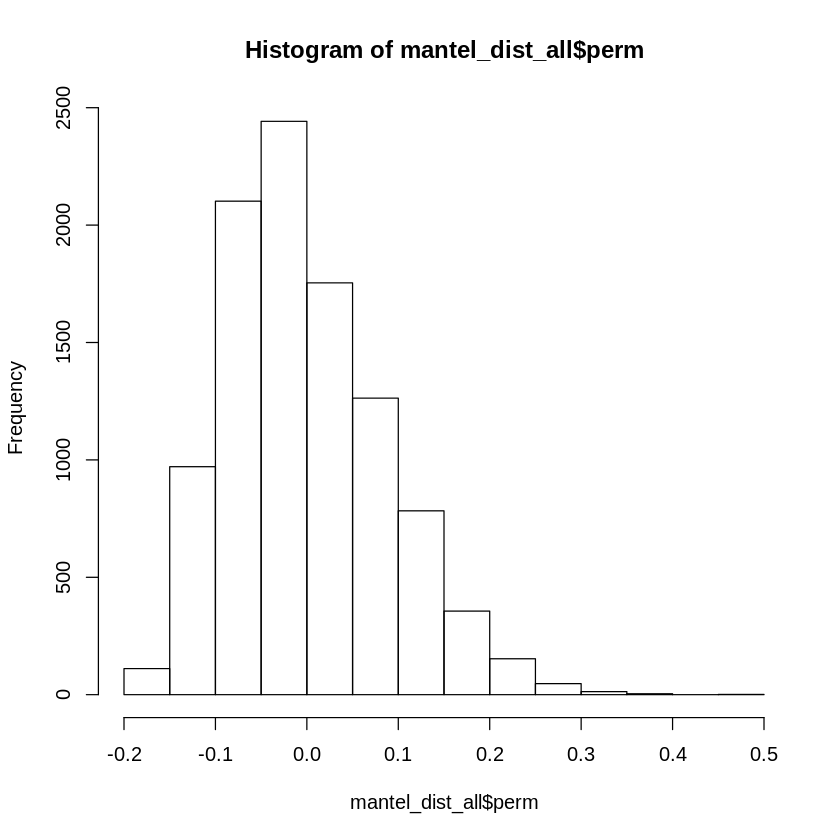

In [7]:
#run mantel test
mantel_dist_all <- mantel(conn_all_dist, dist_all, method="pearson", permutations=10000)
mantel_dist_all
hist(mantel_dist_all$perm)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = connmat12_NS, ydis = dist12, method = "pearson",      permutations = 10000) 

Mantel statistic r: -0.195 
      Significance: 0.67553 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.212 0.230 0.253 0.265 
Permutation: free
Number of permutations: 10000


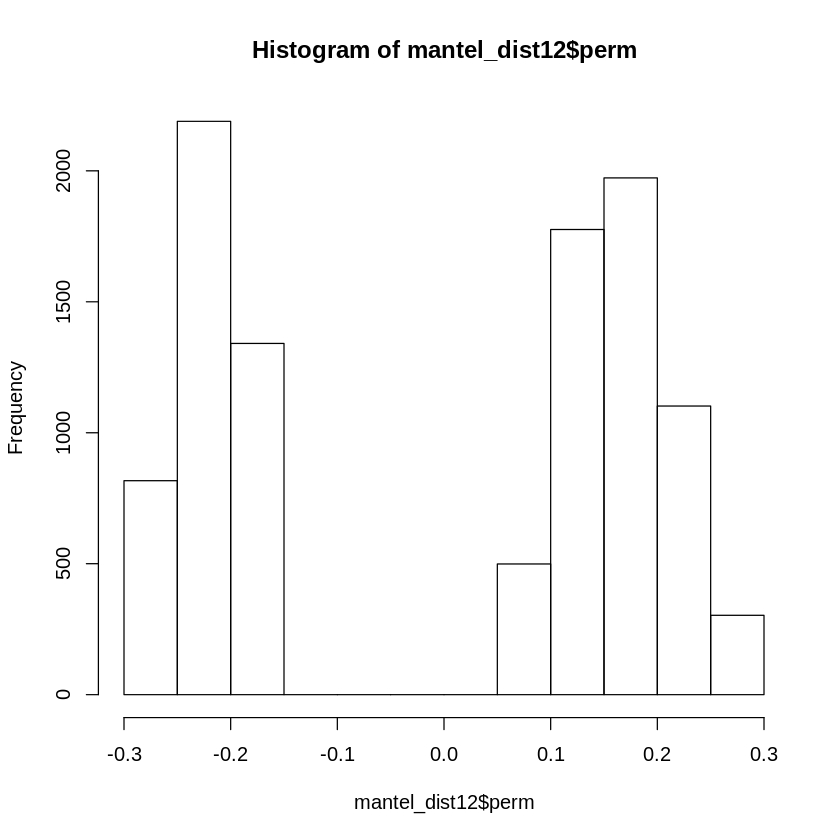

In [8]:
#2012
#run mantel test
mantel_dist12 <- mantel(connmat12_NS, dist12, method="pearson", permutations=10000)
hist(mantel_dist12$perm)
mantel_dist12



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = connmat13_NS, ydis = dist13, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.03241 
      Significance: 0.37326 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.147 0.186 0.222 0.257 
Permutation: free
Number of permutations: 10000


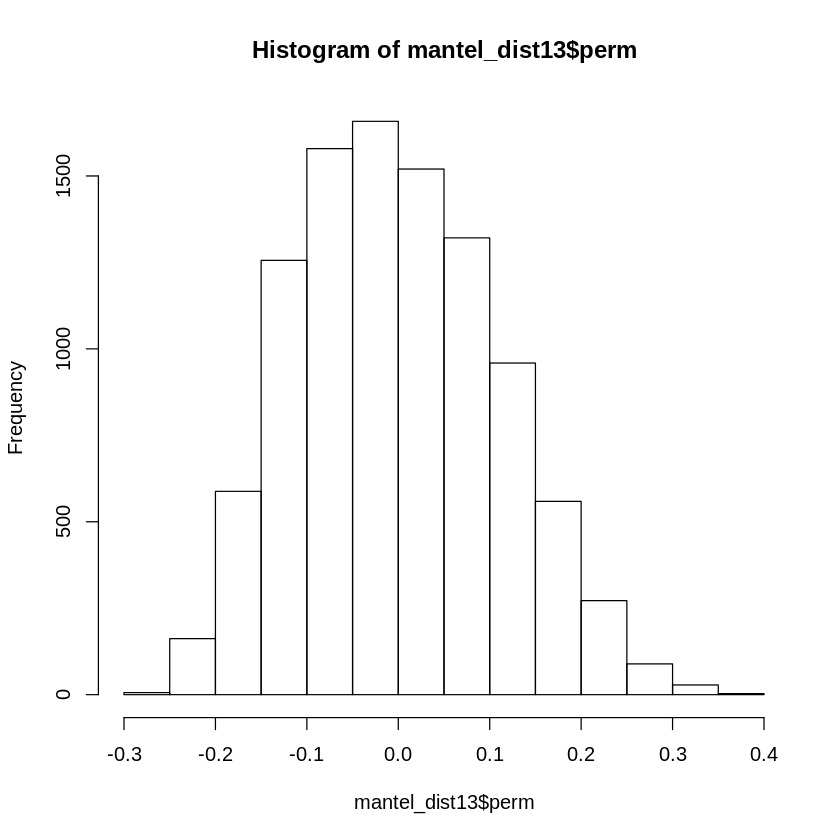

In [126]:
#2013
#run mantel test
mantel_dist13 <- mantel(connmat13_NS, dist13, method="pearson", permutations=10000)
hist(mantel_dist13$perm)
mantel_dist13





Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = connmat14_NS, ydis = dist14, method = "pearson",      permutations = 10000) 

Mantel statistic r: -0.2498 
      Significance: 0.9998 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.149 0.189 0.230 0.285 
Permutation: free
Number of permutations: 10000


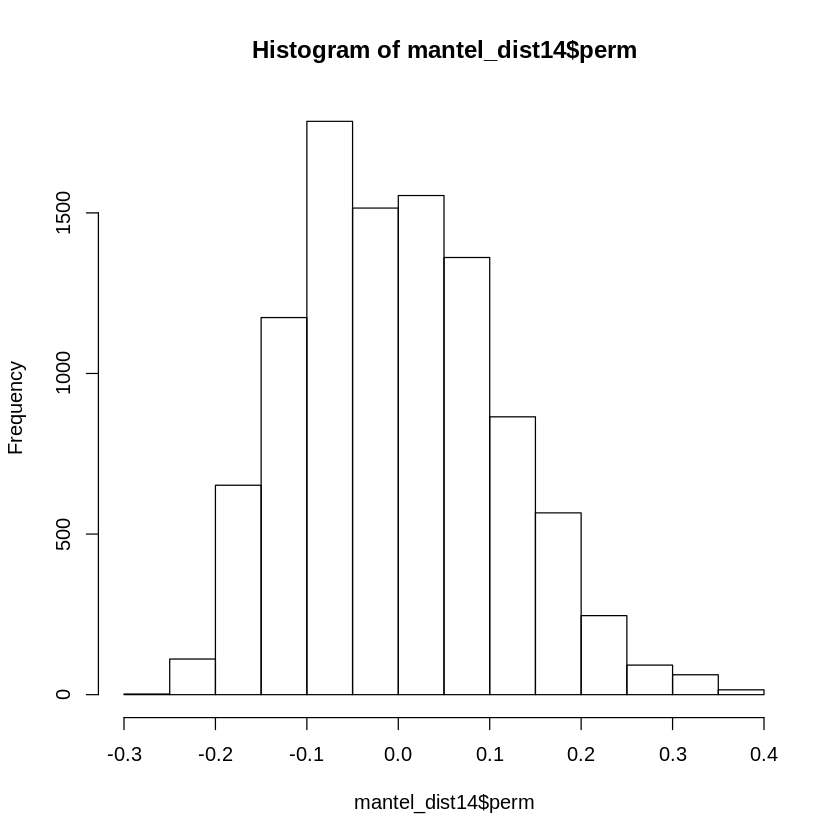

In [127]:
#2014
#run mantel test
mantel_dist14 <- mantel(connmat14_NS, dist14, method="pearson", permutations=10000)
mantel_dist14
hist(mantel_dist14$perm)




Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = connmat15_NS, ydis = dist15, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.07044 
      Significance: 0.27317 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.192 0.237 0.272 0.301 
Permutation: free
Number of permutations: 10000


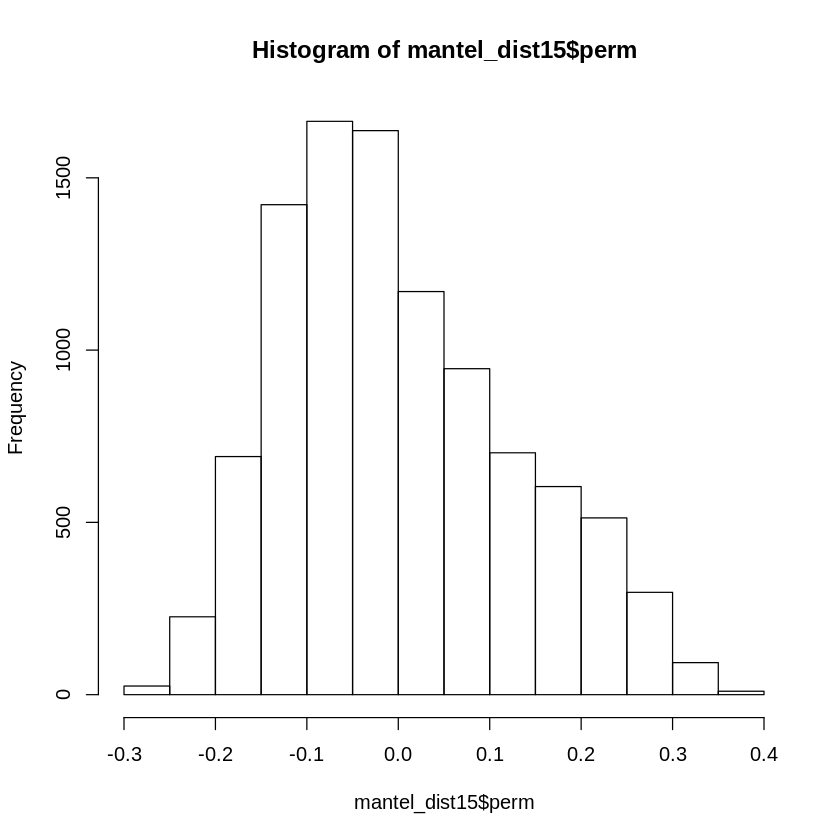

In [128]:
#2015
#run mantel test
mantel_dist15 <- mantel(connmat15_NS, dist15, method="pearson", permutations=10000)
mantel_dist15
hist(mantel_dist15$perm)



## pretty clear that there is no relationship between distance and immigration through larval dispersal rates... make a figure for the mantel test results that show this

Saving 6.67 x 6.67 in image


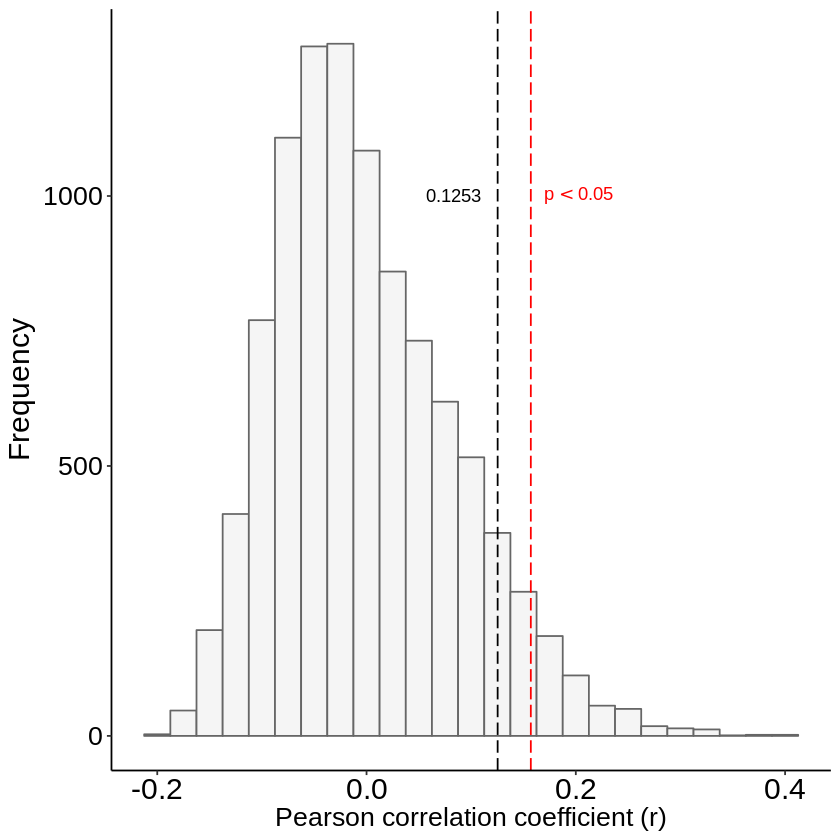

In [184]:
allyear_perm <- data.frame(mantel_dist_all$perm) %>% rename(permuted_r ="mantel_dist_all.perm")

allyear_permuted_r <- ggplot(allyear_perm, aes(x=permuted_r)) +
    geom_histogram(binwidth=0.025, color="gray40",fill="whitesmoke") +
    ylab("Frequency") +
    xlab("Pearson correlation coefficient (r)") +
    theme(axis.title.y=element_text(size=18, color="black"),
    axis.title.x=element_text(size=16, color="black"),
    axis.text.x = element_text(size=18, color="black"),
    axis.text.y = element_text(size=16, color="black")) +
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black")) +
    geom_vline(xintercept=0.1253, colour="black", linetype="longdash")+
    geom_vline(xintercept=0.157, colour="red", linetype="longdash") +
    annotate("text", x=0.1253, y=1000,parse=TRUE, label="0.1253", hjust=1.3, colour="black")+
    annotate("text", x=0.157, y=1000,parse=TRUE, label="p < 0.05", hjust=-0.2, colour="red")    



allyear_permuted_r
ggsave(filename="allyears_mantel.png", plot=allyear_permuted_r, path="~/migest/figures" )
#0.185 for 97.5 %, 0.155 for 95%

Saving 6.67 x 6.67 in image


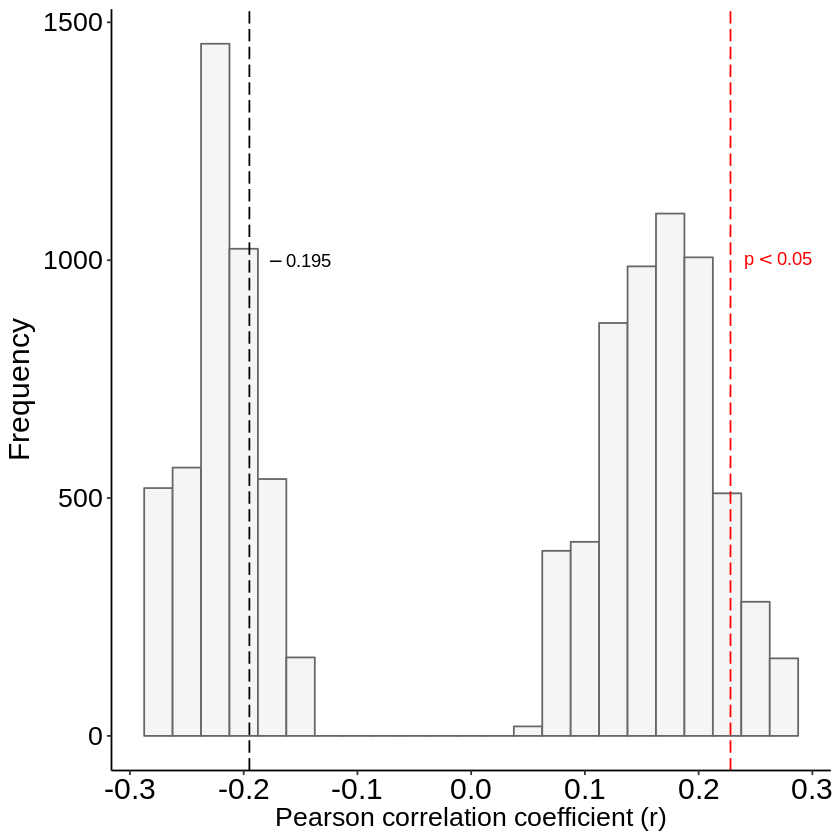

In [192]:
#2012

perm12 <- data.frame(mantel_dist12$perm) %>% rename(permuted_r ="mantel_dist12.perm")

permuted_r12 <- ggplot(perm12, aes(x=permuted_r)) +
    geom_histogram(binwidth=0.025, color="gray40",fill="whitesmoke") +
    ylab("Frequency") +
    xlab("Pearson correlation coefficient (r)") +
    theme(axis.title.y=element_text(size=18, color="black"),
    axis.title.x=element_text(size=16, color="black"),
    axis.text.x = element_text(size=18, color="black"),
    axis.text.y = element_text(size=16, color="black")) +
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black")) +
    geom_vline(xintercept=-0.195, colour="black", linetype="longdash")+
    geom_vline(xintercept=0.228, colour="red", linetype="longdash") +
    annotate("text", x=-0.195, y=1000,parse=TRUE, label="-0.195", hjust=-.3, colour="black") +
    annotate("text", x=0.228, y=1000,parse=TRUE, label="p < 0.05", hjust=-0.2, colour="red")   


permuted_r12
ggsave(filename="mantel2012.png", plot=permuted_r12, path="~/migest/figures" )


Saving 6.67 x 6.67 in image


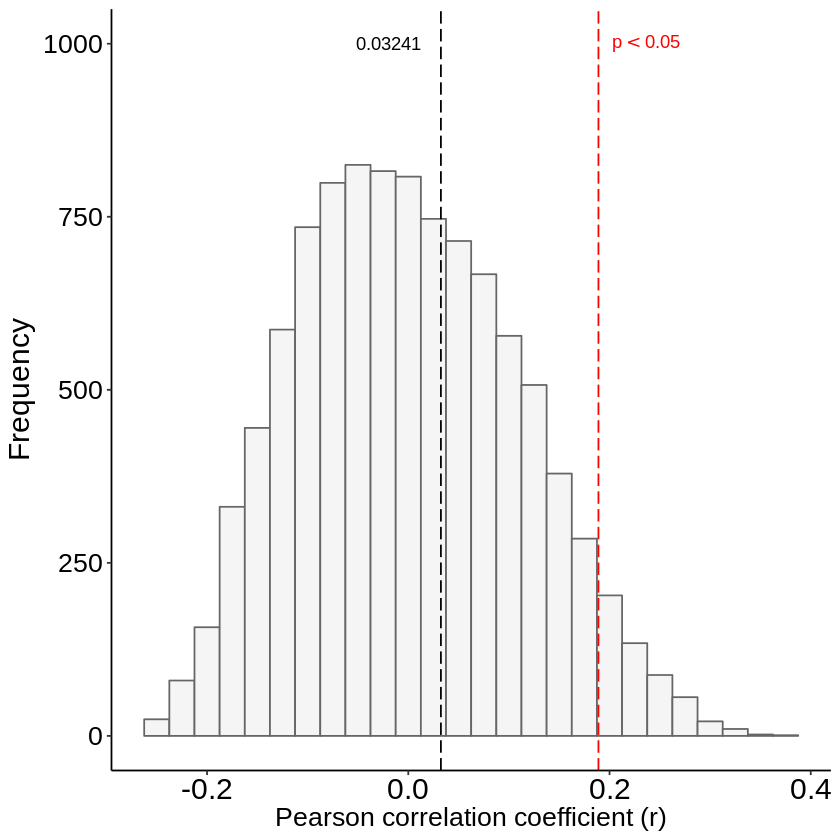

In [182]:
#2013

perm13 <- data.frame(mantel_dist13$perm) %>% rename(permuted_r ="mantel_dist13.perm")

permuted_r13 <- ggplot(perm13, aes(x=permuted_r)) +
    geom_histogram(binwidth=0.025, color="gray40",fill="whitesmoke") +
    ylab("Frequency") +
    xlab("Pearson correlation coefficient (r)") +
    theme(axis.title.y=element_text(size=18, color="black"),
    axis.title.x=element_text(size=16, color="black"),
    axis.text.x = element_text(size=18, color="black"),
    axis.text.y = element_text(size=16, color="black")) +
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black")) +
    geom_vline(xintercept=0.03241, colour="black", linetype="longdash")+
    geom_vline(xintercept=0.189, colour="red", linetype="longdash") +    
    annotate("text", x=0.03241, y=1000,parse=TRUE, label="0.03241", hjust=1.3, colour="black")+
    annotate("text", x=0.189, y=1000,parse=TRUE, label="p < 0.05", hjust=-0.2, colour="red")     


permuted_r13
ggsave(filename="mantel2013.png", plot=permuted_r13, path="~/migest/figures" )



Saving 6.67 x 6.67 in image


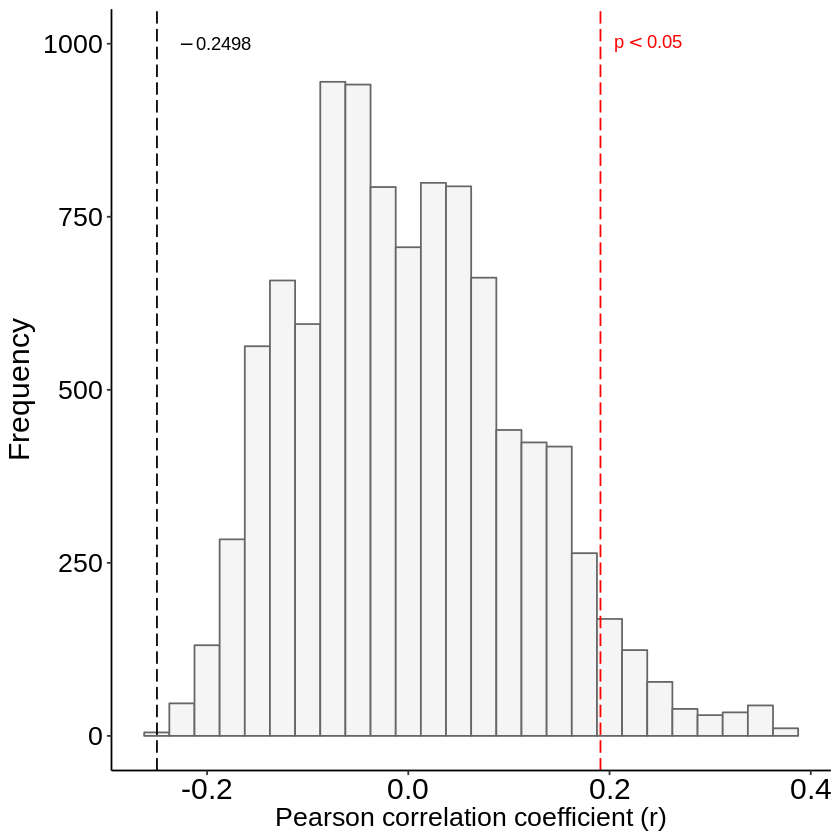

In [189]:
#2014

perm14 <- data.frame(mantel_dist14$perm) %>% rename(permuted_r ="mantel_dist14.perm")

permuted_r14 <- ggplot(perm14, aes(x=permuted_r)) +
    geom_histogram(binwidth=0.025, color="gray40",fill="whitesmoke") +
    ylab("Frequency") +
    xlab("Pearson correlation coefficient (r)") +
    theme(axis.title.y=element_text(size=18, color="black"),
    axis.title.x=element_text(size=16, color="black"),
    axis.text.x = element_text(size=18, color="black"),
    axis.text.y = element_text(size=16, color="black")) +
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black")) +
    geom_vline(xintercept=-0.2498, colour="black", linetype="longdash")+
    geom_vline(xintercept=0.191, colour="red", linetype="longdash") +    
    annotate("text", x=-0.2498, y=1000,parse=TRUE, label="-0.2498", hjust=-.3, colour="black")+
    annotate("text", x=0.191, y=1000,parse=TRUE, label="p < 0.05", hjust=-0.2, colour="red")     


permuted_r14
ggsave(filename="mantel2014.png", plot=permuted_r14, path="~/migest/figures" )



Saving 6.67 x 6.67 in image


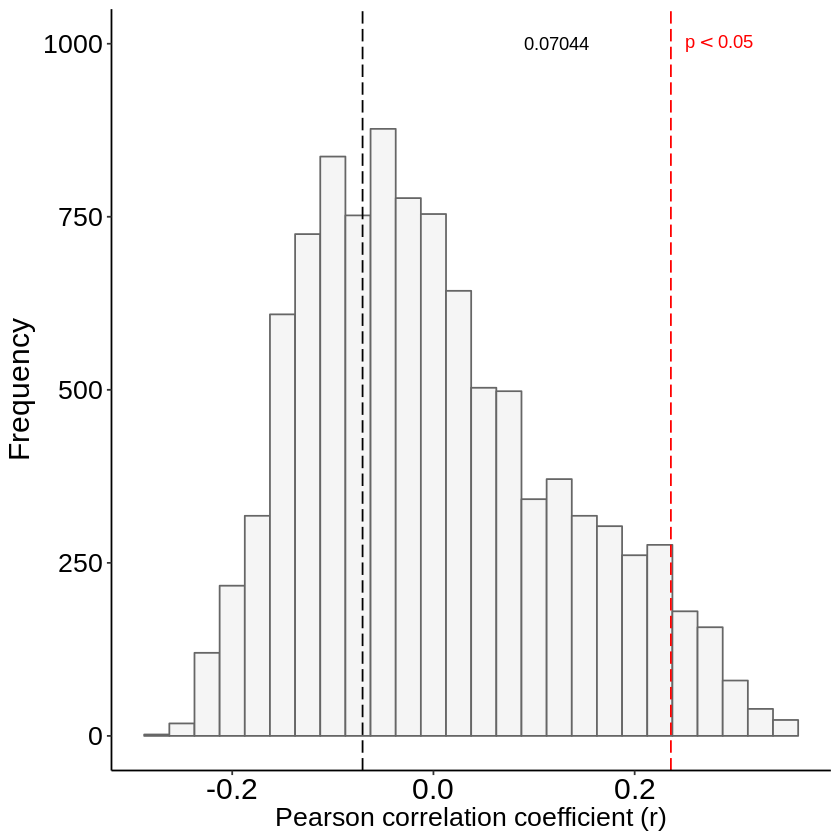

In [191]:
#2015

perm15 <- data.frame(mantel_dist15$perm) %>% rename(permuted_r ="mantel_dist15.perm")

permuted_r15 <- ggplot(perm15, aes(x=permuted_r)) +
    geom_histogram(binwidth=0.025, color="gray40",fill="whitesmoke") +
    ylab("Frequency") +
    xlab("Pearson correlation coefficient (r)") +
    theme(axis.title.y=element_text(size=18, color="black"),
    axis.title.x=element_text(size=16, color="black"),
    axis.text.x = element_text(size=18, color="black"),
    axis.text.y = element_text(size=16, color="black")) +
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black")) +
    geom_vline(xintercept=-0.07044, colour="black", linetype="longdash")+
    geom_vline(xintercept=0.236, colour="red", linetype="longdash") +    
    annotate("text", x=0.07044, y=1000,parse=TRUE, label="0.07044", hjust=-.3, colour="black")+
    annotate("text", x=0.236, y=1000,parse=TRUE, label="p < 0.05", hjust=-0.2, colour="red")     


permuted_r15
ggsave(filename="mantel2015.png", plot=permuted_r15, path="~/migest/figures" )

